# ORIE 3120 Final Project: Wine Quality

DATA SET: https://www.kaggle.com/datasets/manyregression/updated-wine-enthusiast-review

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

from patsy import dmatrices
import statsmodels.graphics.tsaplots as tsa
from sklearn.model_selection import train_test_split

Our dataset contains 14 fields which are described below:

In [ ]:
import pandas as pd
import glob
import os

# setting the path for joining multiple files
files = os.path.join("", "content/*.csv")

# list of merged files returned
files = glob.glob(files)

# joining files with concat and read_csv
df = pd.concat(map(pd.read_csv, files), ignore_index=True)
df = df.reset_index(drop=True).drop(
    ['Unnamed: 0', 'Appellation', 'Appellation', 'Bottle Size', 'Subregion', 'Region',
     'Importer', 'User Avg Rating', 'Reviewer', 'Designation', 'Description'], 
    axis=1
).dropna()

df['Price'] = df['Price'].str.replace('$','') 
df['Price'] = df['Price'].str.replace(',','') 
df['Price'] = df['Price'].astype('float')

df['Alcohol'] = df['Alcohol'].str.replace('%','') 
df['Alcohol'] = df['Alcohol'].str.replace(',','') 
df['Alcohol'] = df['Alcohol'].astype('float')

df['logPrice'] = np.log(df['Price'])

highest = df['Alcohol'].mean() + 3*df['Alcohol'].std()
lowest = df['Alcohol'].mean() - 3*df['Alcohol'].std()
df = df[(df['Alcohol'] < highest) & (df['Alcohol'] > lowest)]

print(df.dtypes)
df

Alcohol                    float64
Category                    object
Country                     object
Date Published              object
Name                        object
Price                      float64
Province                    object
Rating                     float64
Reviewer Twitter Handle     object
Variety                     object
Vintage                    float64
Winery                      object
logPrice                   float64
dtype: object


/var/folders/6d/s9v6hln55xl2n7yv3q96x7zw0000gn/T/ipykernel_11163/3577369303.py:19: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('$','')


,Alcohol,Category,Country,Date Published,Name,Price,Province,Rating,Reviewer Twitter Handle,Variety,Vintage,Winery,logPrice
0,13.0,Red,France,6/1/2019,Château des Jacques 2016 Clos des Thorins (Mo...,41.0,Beaujolais,93.0,@vossroger,Gamay,2016.0,Château des Jacques,3.713572
1,14.5,Red,US,6/1/2019,Stasis 2016 Murmur Vineyard Gamay Noir (Santa ...,42.0,California,92.0,@mattkettmann,"Gamay Noir, Gamay",2016.0,Stasis,3.737670
2,13.5,Red,France,6/1/2019,Château des Jacques 2016 La Roche (Moulin-à-V...,41.0,Beaujolais,92.0,@vossroger,Gamay,2016.0,Château des Jacques,3.713572
3,13.0,Red,France,6/1/2019,Château de Lavernette 2016 Le Clos Jadis (Bea...,35.0,Beaujolais,91.0,@vossroger,Gamay,2016.0,Château de Lavernette,3.555348
4,13.0,Red,France,6/1/2019,Vincent 2016 Domaine de la Conseillère (Julié...,29.0,Beaujolais,90.0,@vossroger,Gamay,2016.0,Vincent,3.367296
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145350,13.5,Red,Argentina,11/1/2002,Alta Vista 2000 Cosecha Red (Mendoza),8.0,Mendoza Province,84.0,@wineschach,"Tempranillo Blend, Tempranillo",2000.0,Alta Vista,2.079442
145352,12.5,Red,Spain,11/1/2002,Estola 1997 Reserva 1997 Tempranillo (La Mancha),8.0,Central Spain,83.0,@wineschach,Tempranillo,1997.0,Estola,2.079442
145353,12.5,Red,Spain,11/1/2002,Viña Albali 1998 Los Molinos Crianza Tempranil...,9.0,Central Spain,82.0,@wineschach,Tempranillo,1998.0,Viña Albali,2.197225
145381,13.5,Red,Spain,8/1/2000,Muruve 1996 Crianza (Toro),13.0,Northern Spain,91.0,@wineschach,"Tinta de Toro, Tempranillo",1996.0,Muruve,2.564949


## Price

In [ ]:
wines = df[['Name', 'Price', 'Rating', 'Vintage']].copy()
wines = wines.dropna()
wines

,Name,Price,Rating,Vintage
0,Château des Jacques 2016 Clos des Thorins (Mo...,41.0,93.0,2016.0
1,Stasis 2016 Murmur Vineyard Gamay Noir (Santa ...,42.0,92.0,2016.0
2,Château des Jacques 2016 La Roche (Moulin-à-V...,41.0,92.0,2016.0
3,Château de Lavernette 2016 Le Clos Jadis (Bea...,35.0,91.0,2016.0
4,Vincent 2016 Domaine de la Conseillère (Julié...,29.0,90.0,2016.0
...,...,...,...,...
145350,Alta Vista 2000 Cosecha Red (Mendoza),8.0,84.0,2000.0
145352,Estola 1997 Reserva 1997 Tempranillo (La Mancha),8.0,83.0,1997.0
145353,Viña Albali 1998 Los Molinos Crianza Tempranil...,9.0,82.0,1998.0
145381,Muruve 1996 Crianza (Toro),13.0,91.0,1996.0


Text(0.5, 1.0, 'Price Distribution Histogram')

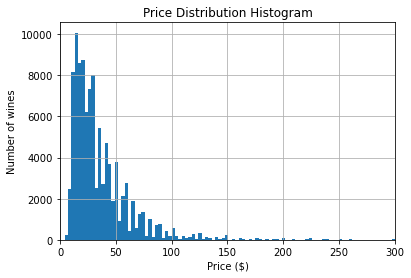

In [ ]:
price = wines['Price']
price.hist(bins=2000)
plt.xlim(0,300)
plt.xlabel('Price ($)')
plt.ylabel('Number of wines')
plt.title('Price Distribution Histogram')

Text(0.5, 1.0, 'Median Rating per Price vs. Wine Price')

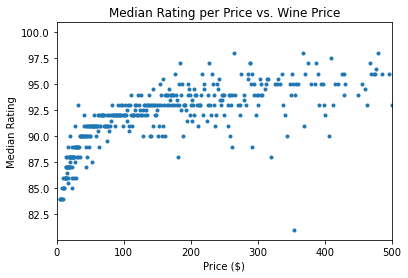

In [ ]:
median_ratings_price = wines.groupby('Price', as_index=False)['Rating'].median()
plt.plot(median_ratings_price['Price'], median_ratings_price['Rating'], '.')
plt.xlim(0, 500)
plt.xlabel('Price ($)')
plt.ylabel('Median Rating')
plt.title('Median Rating per Price vs. Wine Price')

In [ ]:
model = smf.ols(formula = 'Rating ~ 1 + np.log(Price)', data=median_ratings_price).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     973.8
Date:                Sun, 15 May 2022   Prob (F-statistic):          5.33e-112
Time:                        14:14:57   Log-Likelihood:                -852.99
No. Observations:                 427   AIC:                             1710.
Df Residuals:                     425   BIC:                             1718.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        81.4369      0.363    224.435      0.000      80.724      82.150
np.log(Price)     2.2174      0.071     31.205      0.000       2.078       2.357
==============================================================================
Omnibus:                      226.685   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2620.923
Skew:                          -2.001   Prob(JB):                         0.00
Kurtosis:                      14.459   Cond. No.                         22.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Median Rating per Price vs. Wine Price')

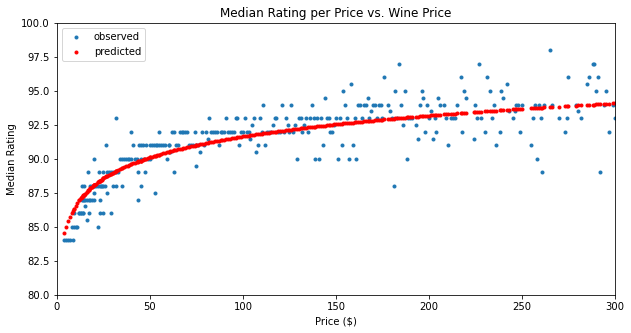

In [ ]:
Yhat = model.predict(exog=median_ratings_price['Price'])

plt.figure(figsize=(10, 5))
plt.plot(median_ratings_price['Price'],median_ratings_price['Rating'],'.', label='observed')
plt.plot(median_ratings_price['Price'],Yhat, '.', color='r', label='predicted')
plt.legend()
plt.xlim(0,300)
plt.ylim(80,100)
plt.xlabel('Price ($)')
plt.ylabel('Median Rating')
plt.title('Median Rating per Price vs. Wine Price')

### Testing Assumptions on Linear Regresion for Log of Price

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defi

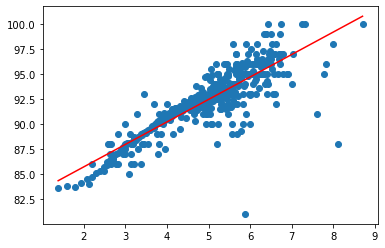

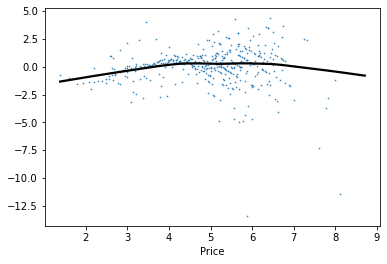

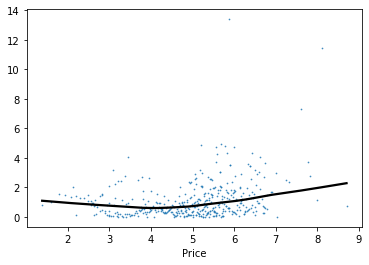

<Figure size 432x288 with 0 Axes>

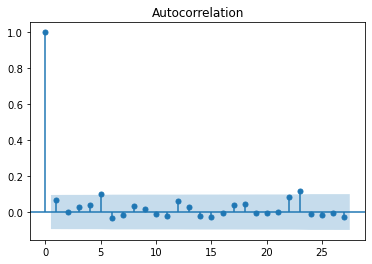

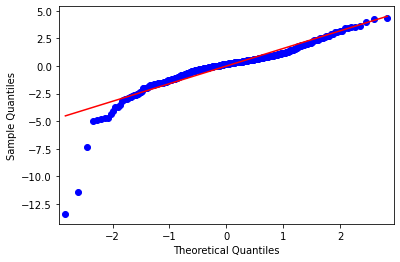

In [ ]:
wines_price = wines.groupby(by=['Price'], as_index=False).mean()
Y = wines_price['Rating']
price = np.log(wines_price['Price'])
X = sm.add_constant(price)
model = sm.OLS(Y, X).fit()
Yhat = model.predict(X)
plt.figure(0)
plt.scatter(price, Y)
plt.plot(price, Yhat, linestyle='-', color='red')
plt.figure(1)
sns.regplot(price, model.resid, lowess=True, line_kws = {'color': 'black'}, scatter_kws = {'s' : 0.5})
plt.figure(2)
sns.regplot(price, abs(model.resid), lowess=True, line_kws = {'color': 'black'}, scatter_kws = {'s' : 0.5})
plt.figure(3)
tsa.plot_acf(model.resid)
plt.figure(4)
sm.qqplot(model.resid, line='r');

## Prediction based on Price

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(price, Y, test_size=0.7,random_state=0)

In [ ]:
X = sm.add_constant(X_train)
model = sm.OLS(y_train, X).fit()
Yhat = model.predict(sm.add_constant(X_test))
sse = (Yhat-y_test).pow(2).sum()
print(sse)
model.summary()

883.3289820776247


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     307.9
Date:                Sun, 15 May 2022   Prob (F-statistic):           1.23e-35
Time:                        16:27:43   Log-Likelihood:                -251.20
No. Observations:                 128   AIC:                             506.4
Df Residuals:                     126   BIC:                             512.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         81.2745      0.656    123.984      0.000      79.977      82.572
Price          2.2659      0.129     17.548      0.000       2.010       2.521
==============================================================================
Omnibus:                      102.132   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1412.215
Skew:                          -2.532   Prob(JB):                    2.19e-307
Kurtosis:                      18.464   Cond. No.                         22.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Median Rating per Price vs. Wine Price')

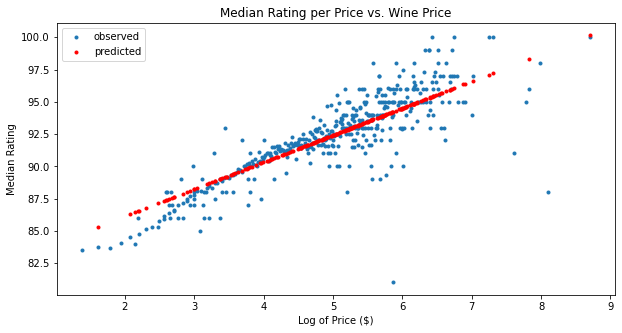

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(price, Y, '.', label='observed')
plt.plot(X_test, Yhat, '.', color='r', label='predicted')
plt.legend()
plt.xlabel('Log of Price ($)')
plt.ylabel('Median Rating')
plt.title('Median Rating per Price vs. Wine Price')

## Other Features

In [ ]:
df

,Alcohol,Category,Country,Date Published,Name,Price,Province,Rating,Reviewer Twitter Handle,Variety,Vintage,Winery,logPrice
0,13.0,Red,France,6/1/2019,Château des Jacques 2016 Clos des Thorins (Mo...,41.0,Beaujolais,93.0,@vossroger,Gamay,2016.0,Château des Jacques,3.713572
1,14.5,Red,US,6/1/2019,Stasis 2016 Murmur Vineyard Gamay Noir (Santa ...,42.0,California,92.0,@mattkettmann,"Gamay Noir, Gamay",2016.0,Stasis,3.737670
2,13.5,Red,France,6/1/2019,Château des Jacques 2016 La Roche (Moulin-à-V...,41.0,Beaujolais,92.0,@vossroger,Gamay,2016.0,Château des Jacques,3.713572
3,13.0,Red,France,6/1/2019,Château de Lavernette 2016 Le Clos Jadis (Bea...,35.0,Beaujolais,91.0,@vossroger,Gamay,2016.0,Château de Lavernette,3.555348
4,13.0,Red,France,6/1/2019,Vincent 2016 Domaine de la Conseillère (Julié...,29.0,Beaujolais,90.0,@vossroger,Gamay,2016.0,Vincent,3.367296
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145350,13.5,Red,Argentina,11/1/2002,Alta Vista 2000 Cosecha Red (Mendoza),8.0,Mendoza Province,84.0,@wineschach,"Tempranillo Blend, Tempranillo",2000.0,Alta Vista,2.079442
145352,12.5,Red,Spain,11/1/2002,Estola 1997 Reserva 1997 Tempranillo (La Mancha),8.0,Central Spain,83.0,@wineschach,Tempranillo,1997.0,Estola,2.079442
145353,12.5,Red,Spain,11/1/2002,Viña Albali 1998 Los Molinos Crianza Tempranil...,9.0,Central Spain,82.0,@wineschach,Tempranillo,1998.0,Viña Albali,2.197225
145381,13.5,Red,Spain,8/1/2000,Muruve 1996 Crianza (Toro),13.0,Northern Spain,91.0,@wineschach,"Tinta de Toro, Tempranillo",1996.0,Muruve,2.564949


In [ ]:
wines2 = df.groupby(by=['Winery', 'Category', 'Variety', 'Country'], as_index = False).count()
wines2 = wines2[wines2['Name'] >= 30]
arr = wines2[['Winery', 'Category', 'Variety', 'Country']].to_numpy().flatten()
wines3 = df.groupby(by=['Winery', 'Category', 'Variety', 'Country'], as_index = False).mean()
wines3 = wines3.loc[(
    (wines3['Winery'].isin(arr)) & (wines3['Category'].isin(arr)) & (wines3['Variety'].isin(arr)) & (wines3['Country'].isin(arr))
xwines_dummies = pd.get_dummies(wines3)
wines_dummies

,Alcohol,Price,Rating,Vintage,logPrice,Winery_Adelsheim,Winery_Albert Bichot,Winery_Alidis,Winery_Alpha Omega,Winery_Alta Vista,...,Variety_Tempranillo,"Variety_Tempranillo Blend, Tempranillo",Variety_Zinfandel,Country_ Argentina,Country_ Austria,Country_ Chile,Country_ France,Country_ Italy,Country_ Spain,Country_ US
323,13.426316,71.771930,91.333333,2011.719298,4.209288,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
324,13.300000,45.000000,89.500000,2009.500000,3.806662,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
325,13.562500,36.375000,90.375000,2012.187500,3.526854,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
326,13.500000,19.000000,90.500000,2011.500000,2.944439,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
501,12.892857,25.500000,88.928571,2014.785714,3.112988,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33287,13.720000,39.400000,92.400000,2013.800000,3.671401,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
33353,13.633333,43.900000,88.066667,2013.733333,3.747058,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
33355,13.500000,20.800000,88.200000,2014.500000,3.003558,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
33359,12.947368,17.964912,88.561404,2012.684211,2.845131,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
X = wines_dummies.loc[:, ~wines_dummies.columns.isin(['Alcohol', 'Price', 'Vintage', 'Rating'])]
X = sm.add_constant(X)
y = wines_dummies['Rating']

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=7)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     6.789
Date:                Sun, 15 May 2022   Prob (F-statistic):           1.63e-25
Time:                        16:33:03   Log-Likelihood:                -366.39
No. Observations:                 286   AIC:                             1047.
Df Residuals:                     129   BIC:                             1621.
Df Model:                         156                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            46.9722      0.652     72.058      0.000      45.682      48.262
logPrice                                          2.7896      0.317      8.801      0.000       2.163       3.417
Winery_Adelsheim                                 -1.6809      1.344     -1.251      0.213      -4.340       0.978
Winery_Albert Bichot                              2.7968      1.223      2.287      0.024       0.378       5.216
Winery_Alidis                                    -5.3724      2.093     -2.567      0.011      -9.513      -1.232
Winery_Alpha Omega                               -0.0660      0.879     -0.075      0.940      -1.806       1.674
Winery_Alta Vista                                -1.9151      1.415     -1.354      0.178      -4.714       0.884
Winery_Altocedro                                 -1.6903      1.520     -1.112      0.268      -4.699       1.318
Winery_Archery Summit                            -0.1921      1.372     -0.140      0.889      -2.906       2.522
Winery_Balletto                                  -0.1596      0.974     -0.164      0.870      -2.086       1.767
Winery_Bergström                                  0.9791      1.308      0.748      0.456      -1.610       3.568
Winery_Bethel Heights                             1.3512      0.981      1.377      0.171      -0.591       3.293
Winery_Black Kite                                 1.6744      1.306      1.282      0.202      -0.909       4.258
Winery_Bodega Catena Zapata                       0.1195      1.389      0.086      0.932      -2.629       2.868
Winery_Bodega Norton                             -0.4995      1.438     -0.347      0.729      -3.345       2.346
Winery_Bodegas Palacio                           -4.4433      2.058     -2.159      0.033      -8.514      -0.372
Winery_Bodegas Valdemar                        1.568e-14   5.62e-15      2.789      0.006    4.56e-15    2.68e-14
Winery_Bouchard PÃ¨re & Fils                   1.048e-14    5.1e-15      2.057      0.042    3.98e-16    2.06e-14
Winery_Bouchard Père & Fils                    2.234e-15   2.58e-15      0.866      0.388   -2.87e-15    7.34e-15
Winery_Bründlmayer                                1.0394      0.908      1.145      0.254      -0.757       2.836
Winery_CVNE                                      -5.0120      2.096     -2.391      0.018      -9.159      -0.865
Winery_Cadence                                -6.655e-15   2.93e-15     -2.270      0.025   -1.25e-14   -8.54e-16
Winery_Carlisle                                   0.8026      0.814      0.986      0.326      -0.807       2.413
Winery_Carpineto                                  2.1711      1.124      1.931      0.056      -0.053       4.395
Winer

In [ ]:
Yhat = model.predict(sm.add_constant(X_test))
sse = (Yhat-y_test).pow(2).sum()
print(sse)

871.6021918549363


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
wines2 = df.groupby(by=['Country', 'logPrice'], as_index = False).count()
wines2 = wines2[wines2['Name'] >= 30]
arr = wines2[['Country']].to_numpy().flatten()
wines3 = df.groupby(by=['Country', 'logPrice'], as_index = False).mean()
wines3 = wines3.loc[((wines3['Country'].isin(arr)))]
wines_dummies = pd.get_dummies(wines3)
wines_dummies

,logPrice,Alcohol,Price,Rating,Vintage,Country_ Argentina,Country_ Australia,Country_ Austria,Country_ Chile,Country_ France,Country_ Israel,Country_ Italy,Country_ New Zealand,Country_ South Africa,Country_ Spain,Country_ US
0,1.386294,13.500000,4.0,83.666667,2009.000000,1,0,0,0,0,0,0,0,0,0,0
1,1.609438,12.950000,5.0,82.900000,2007.300000,1,0,0,0,0,0,0,0,0,0,0
2,1.791759,12.908929,6.0,82.607143,2005.500000,1,0,0,0,0,0,0,0,0,0,0
3,1.945910,13.157627,7.0,83.338983,2006.406780,1,0,0,0,0,0,0,0,0,0,0
4,2.079442,13.294152,8.0,83.450292,2004.736842,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975,6.163315,14.675000,475.0,96.000000,2013.500000,0,0,0,0,0,0,0,0,0,0,1
1976,6.214608,15.300000,500.0,93.000000,2013.000000,0,0,0,0,0,0,0,0,0,0,1
1977,6.437752,14.900000,625.0,94.000000,2011.000000,0,0,0,0,0,0,0,0,0,0,1
1978,6.620073,15.500000,750.0,92.000000,2013.000000,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
X = wines_dummies.loc[:, ~wines_dummies.columns.isin(['Alcohol', 'Price', 'Vintage', 'Rating'])]
X = sm.add_constant(X)
y = wines_dummies['Rating']

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     114.9
Date:                Sun, 15 May 2022   Prob (F-statistic):          2.49e-122
Time:                        17:03:31   Log-Likelihood:                -851.17
No. Observations:                 456   AIC:                             1726.
Df Residuals:                     444   BIC:                             1776.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    74.7374      0.291    257.162      0.000      74.166      75.309
logPrice                  2.1963      0.075     29.219      0.000       2.049       2.344
Country_ Argentina        6.0762      0.262     23.166      0.000       5.561       6.592
Country_ Australia        6.9856      0.273     25.628      0.000       6.450       7.521
Country_ Austria          8.7620      0.277     31.678      0.000       8.218       9.306
Country_ Chile            6.0582      0.290     20.887      0.000       5.488       6.628
Country_ France           7.3833      0.203     36.437      0.000       6.985       7.782
Country_ Israel           6.3567      0.371     17.146      0.000       5.628       7.085
Country_ Italy            6.1765      0.198     31.197      0.000       5.787       6.566
Country_ New Zealand      7.2075      0.396     18.193      0.000       6.429       7.986
Country_ South Africa     6.9526      0.306     22.710      0.000       6.351       7.554
Country_ Spain            5.9974      0.206     29.122      0.000       5.593       6.402
Country_ US               6.7816      0.220     30.782      0.000       6.349       7.215
==============================================================================
Omnibus:                      205.477   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2347.658
Skew:                          -1.626   Prob(JB):                         0.00
Kurtosis:                      13.629   Cond. No.                     3.04e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.04e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
Yhat = model.predict(sm.add_constant(X_test))
sse = (Yhat-y_test).pow(2).sum()
print(sse)

2340.022952060568


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
wines2 = df.groupby(by=['Winery', 'logPrice'], as_index = False).count()
wines2 = wines2[wines2['Name'] >= 30]
arr = wines2[['Winery']].to_numpy().flatten()
wines3 = df.groupby(by=['Winery', 'logPrice'], as_index = False).mean()
wines3 = wines3.loc[((wines3['Winery'].isin(arr)))]
wines_dummies = pd.get_dummies(wines3)
wines_dummies

,logPrice,Alcohol,Price,Rating,Vintage,Winery_Columbia Crest,Winery_Funky Llama,Winery_Georges Duboeuf,Winery_Gnarly Head,Winery_Lynmar,Winery_Montes,Winery_Santa Alicia,Winery_Spring Valley Vineyard,Winery_Tortoise Creek,Winery_Viu Manent
15424,1.791759,12.500000,6.0,88.000000,1998.00000,1,0,0,0,0,0,0,0,0,0
15425,2.079442,12.733333,8.0,86.250000,2007.75000,1,0,0,0,0,0,0,0,0,0
15426,2.197225,13.000000,9.0,88.000000,1997.00000,1,0,0,0,0,0,0,0,0,0
15427,2.397895,13.100000,11.0,87.000000,2004.25000,1,0,0,0,0,0,0,0,0,0
15428,2.484907,13.448718,12.0,87.769231,2012.25641,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51720,3.912023,14.600000,50.0,92.000000,2003.50000,0,0,0,0,0,0,0,0,0,1
51721,4.174387,14.800000,65.0,93.000000,2005.00000,0,0,0,0,0,0,0,0,0,1
51722,4.248495,14.500000,70.0,93.000000,2011.00000,0,0,0,0,0,0,0,0,0,1
51723,4.317488,14.625000,75.0,91.500000,2007.50000,0,0,0,0,0,0,0,0,0,1


In [ ]:
X = wines_dummies.loc[:, ~wines_dummies.columns.isin(['Alcohol', 'Price', 'Vintage', 'Rating'])]
X = sm.add_constant(X)
y = wines_dummies['Rating']

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     13.94
Date:                Sun, 15 May 2022   Prob (F-statistic):           4.55e-08
Time:                        17:03:47   Log-Likelihood:                -59.918
No. Observations:                  37   AIC:                             141.8
Df Residuals:                      26   BIC:                             159.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            71.9925      1.183     60.869      0.000      69.561      74.424
logPrice                          2.8750      0.422      6.821      0.000       2.009       3.741
Winery_Columbia Crest             8.2676      0.996      8.298      0.000       6.220      10.316
Winery_Funky Llama                4.5923      1.024      4.484      0.000       2.487       6.697
Winery_Georges Duboeuf            7.1477      0.750      9.526      0.000       5.605       8.690
Winery_Gnarly Head                7.3589      0.826      8.914      0.000       5.662       9.056
Winery_Lynmar                     9.7597      1.500      6.505      0.000       6.676      12.844
Winery_Montes                     6.9655      0.578     12.058      0.000       5.778       8.153
Winery_Santa Alicia               6.7283      1.034      6.508      0.000       4.603       8.854
Winery_Spring Valley Vineyard     7.0104      1.445      4.852      0.000       4.041       9.980
Winery_Tortoise Creek             6.0291      1.379      4.371      0.000       3.194       8.864
Winery_Viu Manent                 8.1329      0.613     13.274      0.000       6.873       9.392
==============================================================================
Omnibus:                       10.946   Durbin-Watson:                   2.243
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               14.576
Skew:                          -0.757   Prob(JB):                     0.000684
Kurtosis:                       5.676   Cond. No.                     2.40e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.54e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
Yhat = model.predict(sm.add_constant(X_test))
sse = (Yhat-y_test).pow(2).sum()
print(sse)

228.66596179956179


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
wines2 = df.groupby(by=['Variety', 'logPrice'], as_index = False).count()
wines2 = wines2[wines2['Name'] >= 30]
arr = wines2[['Variety']].to_numpy().flatten()
wines3 = df.groupby(by=['Variety', 'logPrice'], as_index = False).mean()
wines3 = wines3.loc[((wines3['Variety'].isin(arr)))]
wines_dummies = pd.get_dummies(wines3)
wines_dummies

,logPrice,Alcohol,Price,Rating,Vintage,Variety_Bordeaux-style Red Blend,"Variety_Bordeaux-style White Blend, White Blend",Variety_Cabernet Franc,Variety_Cabernet Sauvignon,Variety_Chardonnay,...,Variety_Riesling,Variety_Sangiovese,Variety_Sauvignon Blanc,Variety_Shiraz,Variety_Syrah,Variety_Tempranillo,"Variety_Tempranillo Blend, Tempranillo",Variety_Viognier,Variety_White Blend,Variety_Zinfandel
212,1.945910,13.328571,7.0,85.285714,2012.714286,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
213,2.079442,13.181818,8.0,85.090909,2010.727273,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
214,2.197225,13.210526,9.0,85.315789,2010.947368,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
215,2.302585,13.060606,10.0,85.888889,2011.939394,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
216,2.397895,13.159615,11.0,85.903846,2012.500000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5755,4.442651,14.600000,85.0,92.000000,2015.666667,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5756,4.499810,15.200000,90.0,90.000000,2015.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5757,4.553877,14.500000,95.0,92.000000,2016.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5758,4.605170,15.333333,100.0,91.000000,2011.166667,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
X = wines_dummies.loc[:, ~wines_dummies.columns.isin(['Alcohol', 'Price', 'Vintage', 'Rating'])]
X = sm.add_constant(X)
y = wines_dummies['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)
model = sm.OLS(y_train, X_train).fit()
model.summary()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     86.29
Date:                Sun, 15 May 2022   Prob (F-statistic):          2.39e-222
Time:                        17:06:17   Log-Likelihood:                -1678.3
No. Observations:                 879   AIC:                             3413.
Df Residuals:                     851   BIC:                             3546.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                              77.5410      0.229    338.194      0.000      77.091      77.991
logPrice                                            2.4757      0.059     41.888      0.000       2.360       2.592
Variety_Bordeaux-style Red Blend                    3.4857      0.239     14.594      0.000       3.017       3.954
Variety_Bordeaux-style White Blend, White Blend     3.2663      0.372      8.783      0.000       2.536       3.996
Variety_Cabernet Franc                              2.0092      0.339      5.930      0.000       1.344       2.674
Variety_Cabernet Sauvignon                          1.8671      0.252      7.402      0.000       1.372       2.362
Variety_Chardonnay                                  3.1879      0.208     15.292      0.000       2.779       3.597
Variety_Gamay                                       3.8071      0.363     10.479      0.000       3.094       4.520
Variety_Garnacha, Grenache                          1.3816      0.346      3.988      0.000       0.702       2.062
Variety_Grenache                                    3.1416      0.373      8.428      0.000       2.410       3.873
Variety_Grüner Veltliner                            5.1636      0.339     15.231      0.000       4.498       5.829
Variety_Malbec                                      2.6707      0.314      8.511      0.000       2.055       3.287
Variety_Merlot                                      1.4941      0.286      5.224      0.000       0.933       2.055
Variety_Nebbiolo                                    2.6524      0.258     10.290      0.000       2.146       3.158
Variety_Petite Sirah                                2.9375      0.354      8.292      0.000       2.242       3.633
Variety_Pinot Grigio                                2.4515      0.435      5.633      0.000       1.597       3.306
Variety_Pinot Gris                                  4.2362      0.354     11.956      0.000       3.541       4.932
Variety_Pinot Noir                                  2.6450      0.195     13.529      0.000       2.261       3.029
Variety_Red Blends, Red Blends                      2.1557      0.217      9.913      0.000       1.729       2.583
Variety_Riesling                                    4.8664      0.326     14.946      0.000       4.227       5.505
Variety_Sangiovese                                  2.2302      0.236      9.433      0.000       1.766       2.694
Variety_Sauvignon Blanc                             3.2944      0.339      9.717      0.000       2.629       3.960
Variety_Shiraz                                      2.3371      0.327      7.145      0.000       1.695       2.979
Variety_Syrah                                       3.1861      0.2

In [ ]:
Yhat = model.predict(sm.add_constant(X_test))
sse = (Yhat-y_test).pow(2).sum()
print(sse)

5608.403754199189


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
wines2 = df.groupby(by=['Category', 'logPrice'], as_index = False).count()
wines2 = wines2[wines2['Name'] >= 30]
arr = wines2[['Category']].to_numpy().flatten()
wines3 = df.groupby(by=['Category', 'logPrice'], as_index = False).mean()
wines3 = wines3.loc[((wines3['Category'].isin(arr)))]
wines_dummies = pd.get_dummies(wines3)
wines_dummies

,logPrice,Alcohol,Price,Rating,Vintage,Category_Dessert,Category_Red,Category_Rose,Category_Sparkling,Category_White
0,2.197225,10.340000,9.0,86.5,2008.000000,1,0,0,0,0
1,2.302585,12.800000,10.0,86.6,2011.400000,1,0,0,0,0
2,2.397895,13.000000,11.0,85.0,2005.000000,1,0,0,0,0
3,2.484907,12.500000,12.0,85.7,2012.300000,1,0,0,0,0
4,2.564949,11.982353,13.0,88.0,2011.647059,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
904,6.786717,13.000000,886.0,97.0,2014.000000,0,0,0,0,1
905,6.899723,13.500000,992.0,95.0,2015.000000,0,0,0,0,1
906,7.003065,13.500000,1100.0,94.0,2013.000000,0,0,0,0,1
907,7.017506,13.500000,1116.0,97.0,2015.000000,0,0,0,0,1


In [ ]:
X = wines_dummies.loc[:, ~wines_dummies.columns.isin(['Alcohol', 'Price', 'Vintage', 'Rating'])]
X = sm.add_constant(X)
y = wines_dummies['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)
model = sm.OLS(y_train, X_train).fit()
model.summary()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     171.7
Date:                Sun, 15 May 2022   Prob (F-statistic):           6.26e-80
Time:                        17:06:28   Log-Likelihood:                -479.57
No. Observations:                 264   AIC:                             971.1
Df Residuals:                     258   BIC:                             992.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 67.0546      0.335    199.978      0.000      66.394      67.715
logPrice               2.4753      0.089     27.661      0.000       2.299       2.652
Category_Dessert      14.2126      0.261     54.432      0.000      13.698      14.727
Category_Red          12.9744      0.204     63.594      0.000      12.573      13.376
Category_Rose         12.3781      0.519     23.856      0.000      11.356      13.400
Category_Sparkling    13.4787      0.246     54.829      0.000      12.995      13.963
Category_White        14.0108      0.219     64.082      0.000      13.580      14.441
==============================================================================
Omnibus:                       77.986   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              369.253
Skew:                          -1.109   Prob(JB):                     6.57e-81
Kurtosis:                       8.353   Cond. No.                     6.78e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.33e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
Yhat = model.predict(sm.add_constant(X_test))
sse = (Yhat-y_test).pow(2).sum()
print(sse)

1825.5408789007392


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
